In [44]:
import pandas as pd
from kafka import KafkaProducer
from time import sleep
from json import dumps

In [6]:
df = pd.read_csv("instagramData.csv", encoding='ISO-8859-1')

In [7]:
df.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


In [10]:
while True:
    dict_stock = df.sample(1).to_dict(orient="records")[0]
    producer.send('demo_test', value=dict_stock)
    sleep(1)

KeyboardInterrupt: 

In [12]:
import pandas as pd
import numpy as np

DATA PREPROCESSING

In [14]:
# Loading the dataset
df = pd.read_csv("instagramData.csv", encoding='ISO-8859-1')

In [15]:
# Filling missing values (if any)
df.fillna(0, inplace=True)

In [26]:
# If 'Hashtags' is a string column, split and count hashtag
df['hashtag_count'] = df['Hashtags'].apply(lambda x: len(x.split(',')) if isinstance(x, str) else 0)

In [27]:
# Showing a preview of the data
print(df.head())

   Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0         3920       2586           1028           619          56     98   
1         5394       2727           1838          1174          78    194   
2         4021       2085           1188             0         533     41   
3         4528       2700            621           932          73    172   
4         2518       1704            255           279          37     96   

   Comments  Shares  Likes  Profile Visits  Follows  \
0         9       5    162              35        2   
1         7      14    224              48       10   
2        11       1    131              62       12   
3        10       7    213              23        8   
4         5       4    123               8        0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learni

FEATURE ENGINEERING

In [16]:
# Creating engagement rate column
df['engagement_rate'] = (df['Likes'] + df['Comments'] + df['Shares'] + df['Saves']) / df['Impressions']

DATA VISUALIZATION

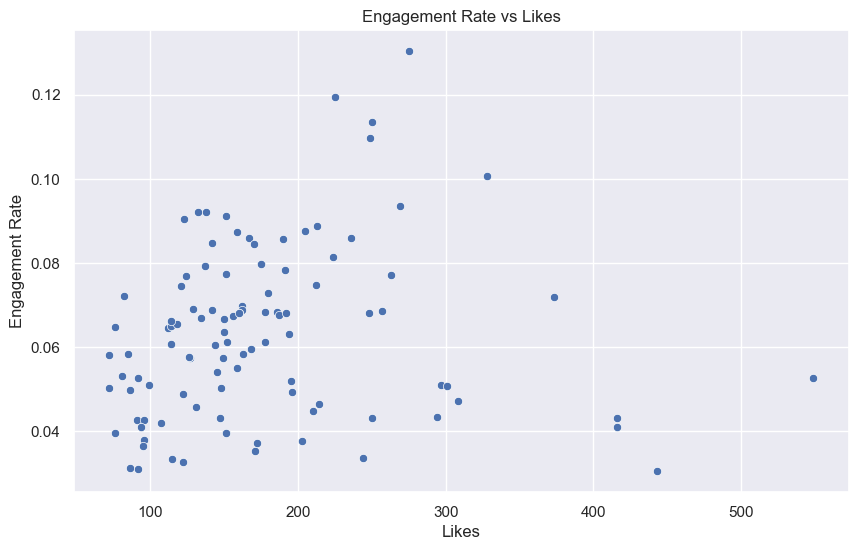

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style for the plot
sns.set(style="darkgrid")

# Plot Engagement Rate vs Likes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Likes', y='engagement_rate', data=df)
plt.title('Engagement Rate vs Likes')
plt.xlabel('Likes')
plt.ylabel('Engagement Rate')
plt.show()


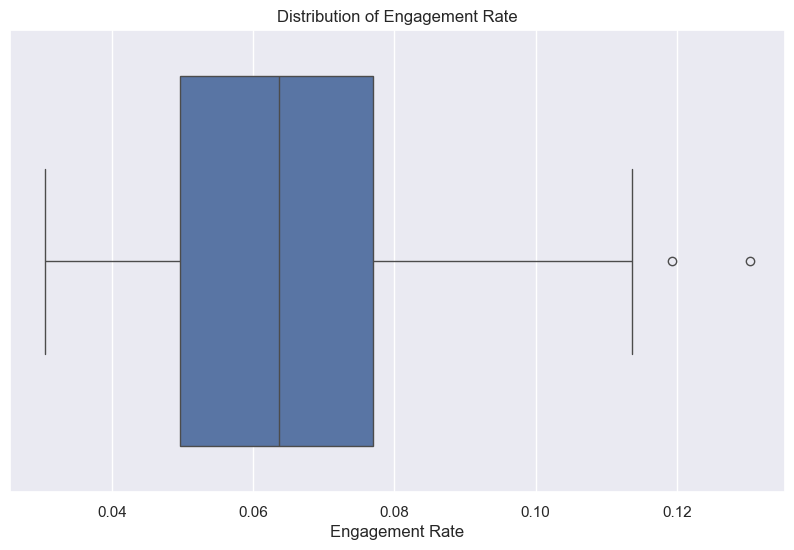

In [38]:
# Box plotting to show the distribution of engagement rate
plt.figure(figsize=(10, 6))
sns.boxplot(x='engagement_rate', data=df)
plt.title('Distribution of Engagement Rate')
plt.xlabel('Engagement Rate')
plt.show()


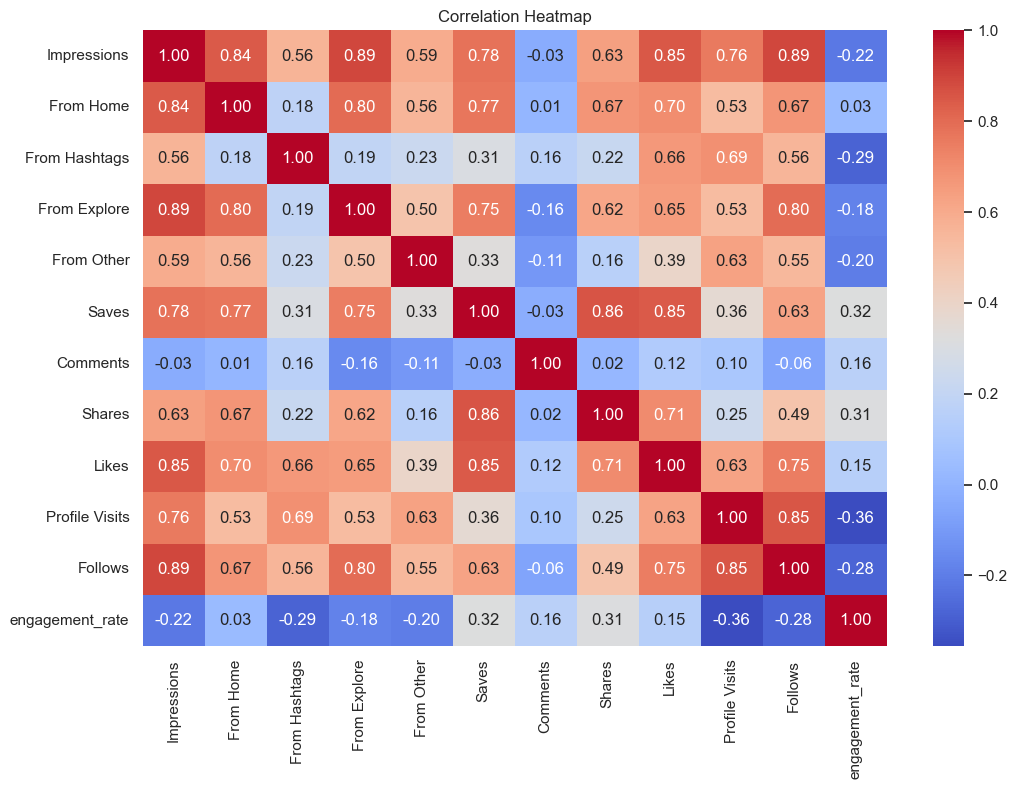

In [39]:
# Computing correlation matrix
corr_matrix = df[['Impressions', 'From Home', 'From Hashtags', 'From Explore', 'From Other', 
                  'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits', 'Follows', 'engagement_rate']].corr()

# Plotting heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


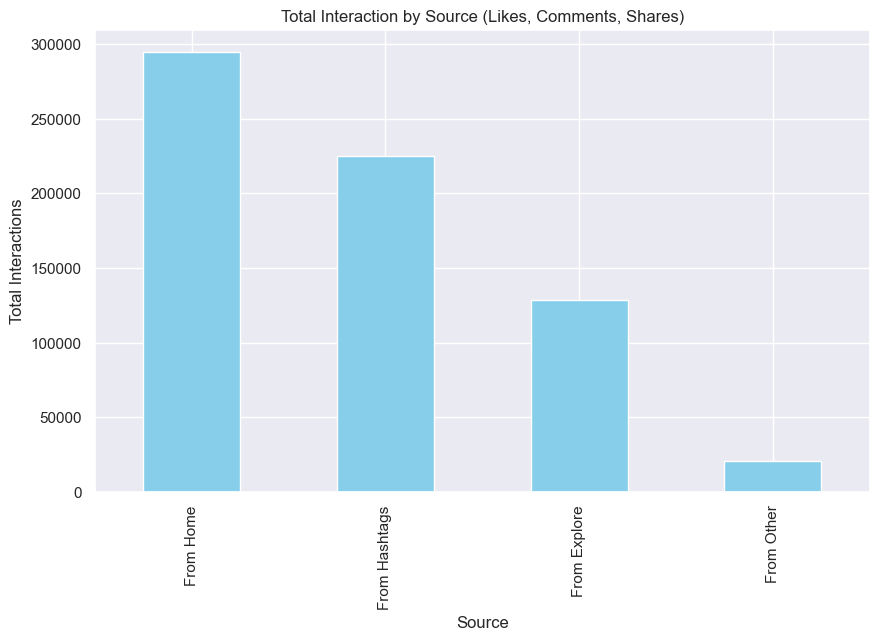

In [40]:
# Creating a bar plot for Likes, Comments, Shares by different sources
source_columns = ['From Home', 'From Hashtags', 'From Explore', 'From Other']

df_source = df[source_columns].sum()

plt.figure(figsize=(10, 6))
df_source.plot(kind='bar', color='skyblue')
plt.title('Total Interaction by Source (Likes, Comments, Shares)')
plt.xlabel('Source')
plt.ylabel('Total Interactions')
plt.show()


In [41]:
# Saving the processed DataFrame to a new CSV file
df.to_csv('processed_instagram_data.csv', index=False)


In [42]:
producer = KafkaProducer(bootstrap_servers=['107.23.14.244:9092'], #change ip here
                         value_serializer=lambda x: 
                         dumps(x).encode('utf-8'))

NoBrokersAvailable: NoBrokersAvailable

In [43]:
producer.send('demo_test', value={'testing from jupyter':'Hello World'})